In [1]:
import numpy as np

In [2]:
from keras import datasets

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [4]:
from keras import Sequential

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(128, use_bias=False, activation='sigmoid', input_shape=(784,)))
# model.add(Dense(512, use_bias=False, activation='sigmoid'))
model.add(Dense(num_classes, use_bias=False, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1280      
Total params: 101,632
Trainable params: 101,632
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5243 - acc: 0.8750 - val_loss: 0.2787 - val_acc: 0.9211
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2502 - acc: 0.9284 - val_loss: 0.2172 - val_acc: 0.9383
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1995 - acc: 0.9429 - val_loss: 0.1800 - val_acc: 0.9470
Epoch 4/20
60000/60000 [========

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import seaborn as sns

(0.91, 1.01)

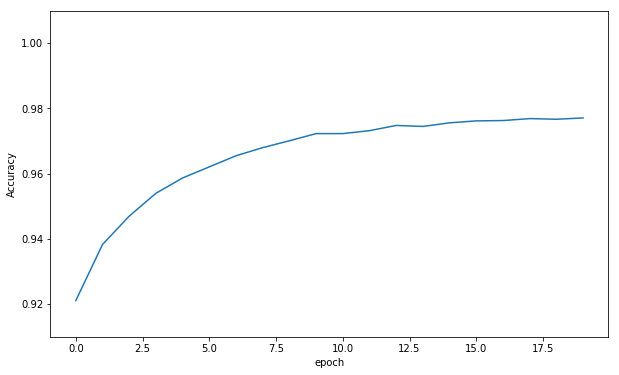

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim(0.91, 1.01)

In [6]:
model.layers

In [7]:
input_layer = model.layers[0]

In [8]:
w1 = input_layer.get_weights()[0]

In [9]:
w1.shape

(784, 128)

In [10]:
np.savetxt("w1.txt", w1)

In [11]:
w2 = model.layers[1].get_weights()[0]
w2.shape

(128, 10)

In [12]:
np.savetxt("w2.txt", w2)

In [26]:
x_test_subset = x_test[:100]
y_pred = model.predict(x_test_subset)
np.savetxt("test_mnist_mlp.txt", np.hstack((y_pred, x_test_subset)), fmt="%g")
y_pred_class = model.predict_classes(x_test_subset)
np.savetxt("test_mnist_mlp_classes.txt", np.hstack((y_pred_class.reshape(-1, 1), x_test_subset)), fmt="%g")

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
# cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
score = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

In [18]:
model_json = cnn_model.to_json()

In [19]:
import json

In [20]:
with open("model.json", 'w') as fd:
    json.dump(json.loads(model_json), fd, indent=2)

In [21]:
cnn_model.save_weights("model.h5")

In [25]:
x_test_subset = x_test[:100]
y_pred = cnn_model.predict(x_test_subset.reshape(-1, 28, 28, 1))
np.savetxt("test_mnist_cnn.txt", np.hstack((y_pred, x_test_subset)), fmt="%g")
y_pred_class = cnn_model.predict_classes(x_test_subset.reshape(-1, 28, 28, 1))
np.savetxt("test_mnist_cnn_classes.txt", np.hstack((y_pred_class.reshape(-1, 1), x_test_subset)), fmt="%g")